# FIT5197 2025 S1 Final Assessment

**SPECIAL NOTE:** Please refer to the [assessment page (Clayton)](https://learning.monash.edu/mod/assign/view.php?id=3764302), or [(Malaysia)](https://learning.monash.edu/mod/assign/view.php?id=3939231) for rules, general guidelines and marking rubrics of the assessment (the marking rubric for the kaggle competition part will be released near the deadline - around 5 working days - in the same page). Failure to comply with the provided information will result in a deduction of mark (e.g., late penalties) or breach of academic integrity.

**PLEASE ENSURE YOU READ AND COMPLETE ALL REQUIRED INFORMATION BELOW BEFORE STARTING YOUR ASSIGNMENT, AS FAILURE TO DO SO WILL RESULT IN A MARK OF ZERO.**


**YOUR NAME**: Adrian Leong Tat Wei

**STUDENT ID**: 27030768

**KAGGLE NAME** Adrian Leong(required for marking – see Part 1, Question 5 or Part 2):

**Important: Your Kaggle name must be identical (including capitalization, spacing, and special characters) across both Regression and Classification contests. Marks will be deducted if your Kaggle name is inconsistent or missing. No exceptions will be made!**

You can find your Kaggle name by clicking on your profile icon at the top-right corner of the Kaggle website. For example, here is a screenshot of where to find it:

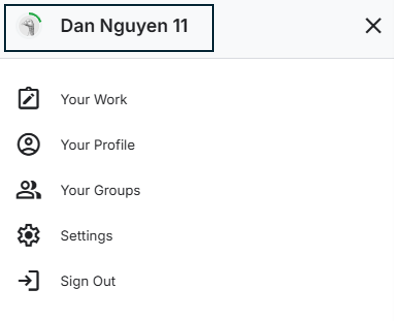

Please also enter your details in this [google form](https://forms.gle/HGxmCyd28XBebvi66).

# Part 1 Regression (50 Marks)

A few thousand people were questioned in a [life and wellbeing survey](https://www.get-happier.com/) to build a model to predict happiness of an individual. You need to build regression models to optimally predict the variable in the survey dataset called 'happiness' based on any, or all, of the other survey question responses. 

You have been provided with two datasets, ```regression_train.csv``` and ```regression_test.csv```. Using these datasets, you hope to build a model that can predict happiness level using the other variables. ```regression_train.csv``` comes with the ground-truth target label (i.e. happiness level) whereas `regression_test.csv` comes with independent variables (input information) only.

On the order of around 70 survey questions have been converted into predictor variables that can be used to predict happiness. We do not list all the predictor names here, but their names given in the data header can clearly be linked to the survey questions. e.g., the predictor variable 'iDontFeelParticularlyPleasedWithTheWayIAm' corresponds to the survey question 'I don’t feel particularly pleased with the way I am.'

**PLEASE NOTE THAT THE USE OF LIBRARIES ARE PROHIBITED IN THESE QUESTIONS UNLESS STATED OTHERWISE, ANSWERS USING LIBRARIES WILL RECEIVE 0 MARKS**

## Question 1 (NO LIBRARIES ALLOWED) (4 Mark)
Please load the ```regression_train.csv``` and fit a [$\textbf{multiple linear regression model}$](https://en.wikipedia.org/wiki/Linear_regression) with 'happiness' being the target variable. According to the summary table, which predictors do you think are possibly associated with the target variable (use the significance level of 0.01), and which are the **Top 5** strongest predictors? Please write an R script to automatically fetch and print this information.

**NOTE**: Manually doing the above tasks will result in 0 marks.

In [1]:
# ANSWER BLOCK
# Load regression_train.csv
regression_train <- read.csv("regression_train.csv")
lm.fit <- lm(happiness ~ ., data = regression_train)

# Save the summary output to an object
lm.fit_summary <- summary(lm.fit)

# Access the coefficients table and convert to a data frame
coefficients_table <- as.data.frame(lm.fit_summary$coefficients)

# Significance level, alpha = 0.01
alpha <- 0.01

# Filter for significant variables first
significant_coeffs <- coefficients_table[coefficients_table$`Pr(>|t|)` < alpha, ]

# Print predictors associated with target variable
significant_coeffs

# Sort these significant variables by highest estimate first
significant_and_sorted <- significant_coeffs[order(significant_coeffs$Estimate, decreasing = TRUE), ]

# List top 5 strongest predictors
head(significant_and_sorted,5)

,Estimate,Std. Error,t value,Pr(>|t|)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-22.138272,3.5197268,-6.289770,7.814219e-10
income10k - 15k,6.268117,1.2386952,5.060258,6.210721e-07
income120k - 150k,11.373025,1.2340393,9.216096,1.369692e-18
income150k - 200k,11.718396,1.2434310,9.424243,2.676570e-19
income15k - 20k,15.447908,1.2809264,12.059949,4.650658e-29
income200k above,20.109900,1.3788320,14.584735,1.902543e-39
income20k - 50k,20.839607,1.5825100,13.168704,1.604206e-33
income50k - 80k,28.546980,1.7382901,16.422449,2.033722e-47
income80k - 120k,37.315988,1.6548496,22.549474,6.160552e-75


,Estimate,Std. Error,t value,Pr(>|t|)
,<dbl>,<dbl>,<dbl>,<dbl>
income80k - 120k,37.31599,1.654850,22.54947,6.160552e-75
income50k - 80k,28.54698,1.738290,16.42245,2.033722e-47
income20k - 50k,20.83961,1.582510,13.16870,1.604206e-33
income200k above,20.10990,1.378832,14.58474,1.902543e-39
income15k - 20k,15.44791,1.280926,12.05995,4.650658e-29


## Question 2 (2 Mark)
[**R squared**](https://en.wikipedia.org/wiki/Coefficient_of_determination) from the summary table reflects that the full model doesn't fit the training dataset well; thus, you try to quantify the error between the values of the ground-truth and those of the model prediction. You want to write a function to predict 'happiness' with the given dataset and calculate the [root mean squared error (rMSE)](https://en.wikipedia.org/wiki/Root-mean-square_deviation) between the model predictions and the ground truths. Please test this function on the full model and the training dataset.

In [2]:
# ANSWER BLOCK
# Function to predict and calculate error metrics for a given model and dataset
calculate_RMSE <- function(model, dataset, ground_truth_col_name) {
  # Get ground truth values
  ground_truth <- dataset[[ground_truth_col_name]] # Using [[ ]] for column name as string

  # Get model predictions
  predictions <- predict(model, newdata = dataset)

  # Calculate residuals
  residuals <- ground_truth - predictions

  # Calculate error metrics
  rmse <- sqrt(mean(residuals^2))
  # Return result
  return(rmse)
}

#Also define name of target ground truth column name
target <- "happiness"
multlin_model_error <- calculate_RMSE(lm.fit, regression_train, target)
cat("RMSE: ", multlin_model_error)


RMSE:  6.672557

## Question 3 (2 Marks)
You find the full model complicated and try to reduce the complexity by performing [bidirectional stepwise regression](https://en.wikipedia.org/wiki/Stepwise_regression) with [BIC](https://en.wikipedia.org/wiki/Bayesian_information_criterion).

Calculate the **rMSE** of this new model with the function that you implemented previously. Is there anything you find unusual? Explain your findings in 100 words.

In [3]:
# ANSWER BLOCK
# Perform bidirectional stepwise regression using BIC
#
# Arguments for step():
#   object: The initial model.
#   scope: Defines the range of models to consider.
#          list(lower = ~1) means the smallest model is just an intercept.
#          list(upper = ~.) means the largest model is the full model (all predictors).
#   direction: "both" for bidirectional stepwise selection.
#   k: The penalty per parameter. For BIC, k = log(n), where n is the number of observations.
#
# Important: Ensure 'variable' is your response variable and 'regression_train' is your data.

n_obs <- nrow(regression_train) # Number of observations in your training data
bic_penalty <- log(n_obs)

bic_step_model <- step(
  object = lm.fit,
  scope = list(lower = ~1, upper = ~.),
  direction = "both",
  k = bic_penalty,
  trace = 0 # suppress verbose output
)

# View the summary of the selected model
summary(bic_step_model)

# Compare the final model to your initial full model
cat("\n--- BIC Stepwise Model Information ---")
cat("\nNumber of predictors (excluding intercept):", length(coef(bic_step_model)) - 1)
cat("\nBIC for selected model:", BIC(bic_step_model))
cat("\nRMSE for selected model:", calculate_RMSE(bic_step_model, regression_train, target))

cat("\n\n--- Full Model Information ---")
cat("\nNumber of predictors (excluding intercept):", length(coef(lm.fit)) - 1)
cat("\nBIC for full model:", BIC(lm.fit))
cat("\nRMSE for selected model:", calculate_RMSE(lm.fit, regression_train, target))
cat("\n")

cat("\nThe final model is noticeably less complex, but only has marginally worse performance.\n") 


Call:
lm(formula = happiness ~ income + alwaysStressed + alwaysHaveFun + 
    alwaysSerious + alwaysDepressed + iFindMostThingsAmusing + 
    iUsuallyHaveAGoodInfluenceOnEvents, data = regression_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.365  -4.587  -0.030   5.203  18.888 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        -13.7027     0.6348 -21.587  < 2e-16 ***
income10k - 15k                      6.9401     1.2123   5.725 1.82e-08 ***
income120k - 150k                   12.4102     1.1859  10.465  < 2e-16 ***
income150k - 200k                   12.1301     1.1885  10.206  < 2e-16 ***
income15k - 20k                     14.0070     1.1820  11.851  < 2e-16 ***
income200k above                    20.6292     1.3292  15.519  < 2e-16 ***
income20k - 50k                     22.1535     1.4718  15.052  < 2e-16 ***
income50k - 80k                     29.0212     1.6938  17.133  < 2e-16 ***
inc


--- BIC Stepwise Model Information ---
Number of predictors (excluding intercept): 14
BIC for selected model: 3510.389
RMSE for selected model: 7.330305

--- Full Model Information ---
Number of predictors (excluding intercept): 68
BIC for full model: 3751.964
RMSE for selected model: 6.672557

The final model is noticeably less complex, but only has marginally worse performance.


## Question 4 (2 Mark)
Although stepwise regression has reduced the model complexity significantly, the model still contains a lot of variables that we want to remove. Therefore, you are interested in lightweight linear regression models with ONLY TWO predictors. Write a script to automatically find the best lightweight model which corresponds to the model with the least **rMSE** on the training dataset. Compare the **rMSE** of the best lightweight model with the **rMSE** of the full model - ```lm.fit``` - that you built previously. Give an explanation for these results based on consideration of the predictors involved.

In [4]:
# ANSWER BLOCK
# Find the best two predictor model
# Get the names of all potential predictor variables from the training data
predictor_names <- names(regression_train)[names(regression_train) != target]

# Generate all unique combinations of two predictor names
# combn(x, m) generates all combinations of m elements from x
two_predictor_combinations <- combn(predictor_names, 2, simplify = FALSE)

# Initialize variables to store the best model's information
min_rmse_two_predictors <- Inf
best_two_predictor_model_formula <- NULL
best_two_predictor_model_object <- NULL # To store the actual lm object

# Loop through each combination of two predictors
for (i in seq_along(two_predictor_combinations)) {
  pair <- two_predictor_combinations[[i]]

  # Construct the model formula string for the current pair
  formula_str <- paste(target, "~", paste(pair, collapse = " + "))
  model_formula <- as.formula(formula_str)

  # Fit the linear model using only these two predictors
  current_model <- lm(model_formula, data = regression_train)

  # Calculate RMSE for the current model on the training data
  current_rmse <- calculate_RMSE(current_model, regression_train, target)

  # Check if this model has a lower RMSE than the current best
  if (current_rmse < min_rmse_two_predictors) {
    min_rmse_two_predictors <- current_rmse
    best_two_predictor_model_formula <- formula_str
    best_two_predictor_model_object <- current_model # Store the model object
  }
}
# Display results
cat("Best two predictor model results:", "\n")
cat("Formula:", best_two_predictor_model_formula, "\n")

# Comparison and explanation
cat("\n--- Comparison of RMSEs ---", "\n")
cat("RMSE of two predictor model:", min_rmse_two_predictors, "\n")
cat("RMSE of full model:", calculate_RMSE(lm.fit, regression_train, target), "\n")

cat("\n--- Explanation of Results ---", "\n")
cat("The results show that despite losing nearly all of the predictors initially available, the RMSE of the two predictor model is barely lower than the full model.\n")
cat("However, the full model does perform better.\n")
cat("This is generally expected, as:\n")
cat("1. Flexibility: The full model has a much higher number of parameters (coefficients) and thus greater flexibility to 'learn' and even memorize the training data. With 50+ predictors, it can capture intricate relationships that a two-predictor model simply cannot.\n")
cat("2. Overfitting to Training Data: Despite the lower RMSE, the model might simply memorize the data rather than learning the real relationships, which can lead to poor performance on new, unseen data.\n")
cat("3. Trade-off: The lightweight model sacrifices some fit to the training data (resulting in a higher RMSE) in favor of simplicity and interpretability. The benefit is that the model is less prone to overfitting and can often generalize better to new data, especially if many of the 50+ predictors in the full model were not truly strong predictors or were highly correlated.\n")
cat("4. Information Content: The 'best' two predictors found by this search are those that, in combination, capture the most predictive power for '", target, "' on their own, minimizing the error. The full model potentially includes many predictors that contribute very little or redundant information, making it overly complex without significant gains in actual predictive accuracy on independent data.\n\n")
cat("To truly determine which model is 'best', you would need to evaluate both the full model and the best lightweight model on an independent test dataset or use cross-validation techniques. \n")


Best two predictor model results: 
Formula: happiness ~ income + alwaysStressed 

--- Comparison of RMSEs --- 
RMSE of two predictor model: 7.885411 
RMSE of full model: 6.672557 

--- Explanation of Results --- 
The results show that despite losing nearly all of the predictors initially available, the RMSE of the two predictor model is barely lower than the full model.
However, the full model does perform better.
This is generally expected, as:
1. Flexibility: The full model has a much higher number of parameters (coefficients) and thus greater flexibility to 'learn' and even memorize the training data. With 50+ predictors, it can capture intricate relationships that a two-predictor model simply cannot.
2. Overfitting to Training Data: Despite the lower RMSE, the model might simply memorize the data rather than learning the real relationships, which can lead to poor performance on new, unseen data.
3. Trade-off: The lightweight model sacrifices some fit to the training data (resulting

### ANSWER (TEXT)

## Question 5 (Libraries are allowed) (40 Marks)
As a Data Scientist, one of the key tasks is to build models $\textbf{most appropriate/closest}$ to the truth; thus, modelling will not be limited to the aforementioned steps in this assignment. To simulate for a realistic modelling process, this question will be in the form of a [Kaggle competition](https://www.kaggle.com/t/e2b457fe991d4093af8c0ee067d69ac1) among students to find out who has the best model.

Thus, you **will be graded** by the **rMSE** performance of your model, the better your model, the higher your score. Additionally, you need to describe/document your thought process in this model building process, this is akin to showing your working properly for the mathematic sections. If you don't clearly document the reasonings behind the model you use, we will have to make some deductions on your scores.

This is the [video tutorial](https://www.youtube.com/watch?v=rkXc25Uvyl4) on how to join any Kaggle competition. 

When you optimize your model's performance, you can use any supervised model that you know and feature selection might be a big help as well. [Check the non-exhaustive set of R functions relevant to this unit](https://learning.monash.edu/mod/resource/view.php?id=2017193) for ideas for different models to try.

$\textbf{Note}$ Please make sure that we can install the libraries that you use in this part, the code structure can be:

```install.packages("some package", repos='http://cran.us.r-project.org')```

```library("some package")```

Remember that if we cannot run your code, we will have to give you a deduction. Our suggestion is for you to use the standard ```R version 3.6.1```

You also need to name your final model ``fin.mod`` so we can run a check to find out your performance. A good test for your understanding would be to set the previous $\textbf{BIC model}$ to be the final model to check if your code works perfectly.

In [13]:
# Load necessary libraries (ensure you have these installed)
library(e1071)      # For Support Vector Machines (svmRadial method)
library(caret)      # For streamlined model training, CV, and tuning
library(dplyr)      # For data manipulation
library(forcats)    # For factor handling
library(Matrix)     # Used by dummyVars for efficient sparse matrix creation
library(glmnet)     # For glmnet meta-model option 
library(randomForest) # For Random Forest base model (and rf meta-model option)
library(xgboost)    # For XGBoost base model
library(doParallel) # Parallel processing
stopImplicitCluster() # Clears any previously lingering clusters
registerDoParallel(cores = detectCores() - 1) # Use all but one core

# --- Data Pre-processing Configuration (Keep as is) ---
ordinal_vars <- c(
  "whatIsYourHeightExpressItAsANumberInMetresM",
  "howOftenDoYouFeelSociallyConnectedWithYourPeersAndFriends",
  "howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsV",
  "doYouFeelComfortableEngagingInConversationsWithPeopleFromDiffer"
)

multi_level_categorical_vars <- c(
  "doYouHaveASupportSystemOfFriendsAndFamilyToTurnToWhenNeeded",
  "income"
)

custom_ordinal_orders <- list(
  "income" =
    c("0 - 10k","10k - 15k", "15k - 20k", "20k - 50k", "50k - 80k", "80k - 120k", "120k - 150k", "150k - 200k", "200k above"),
  "howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsV" =
    c("No", "Rarely", "At least once a month","At least once a week", "More than three times a week"),
  "howOftenDoYouFeelSocialallyConnectedWithYourPeersAndFriends" =
    c("Never", "Rarely", "Sometimes", "Always"),
  "doYouFeelComfortableEngagingInConversationsWithPeopleFromDiffer" =
    c("Never", "Rarely", "Sometimes", "Always")
)

# --- Global Objects for Data Preparation (Learned from Training Data) ---
dummy_spec <- NULL
ohe_feature_names <- NULL 

# --- Comprehensive Data Preparation Function ---
factor_convert_data <- function(data) {
  for (var in ordinal_vars) {
    if (var %in% base::names(custom_ordinal_orders)) {
      data[[var]] <- base::factor(data[[var]],
                            levels = custom_ordinal_orders[[var]],
                            ordered = TRUE)
    } else {
      data[[var]] <- base::factor(data[[var]], ordered = TRUE)
    }
  }
  for (var in multi_level_categorical_vars) {
    if (var %in% base::names(custom_ordinal_orders)) {
        data[[var]] <- base::factor(data[[var]],
                            levels = custom_ordinal_orders[[var]],
                            ordered = FALSE)
    } else {
      data[[var]] <- base::as.factor(data[[var]])
    }
  }
  return(data)
}

prepare_data_for_model <- function(data, is_training = TRUE, target_variable_name = "happiness") {

  data_fe <- factor_convert_data(data)

  if (is_training) {
    if (base::any(base::is.na(data_fe))) {
      na_count <- base::sum(base::is.na(data_fe))
      cols_with_na <- base::names(data_fe)[base::colSums(base::is.na(data_fe)) > 0]
      base::stop(
        paste0("Error: Found ", na_count, " NA values in training data after initial preprocessing. ",
               "Columns with NAs: ", paste(cols_with_na, collapse = ", "),
               ". Please clean your raw data or update 'custom_ordinal_orders'.")
      )
    }
    # base::message("Training data is clean (no NAs) after initial preprocessing.")
  } else {
    if (base::any(base::is.na(data_fe))) {
      na_count_test <- base::sum(base::is.na(data_fe))
      base::warning(paste0("Warning: Found ", na_count_test, " NA values in test data after initial preprocessing. These will be handled by predict.dummyVars or may cause issues."))
    }
  }

  predictors_for_ohe_current <- data_fe
  if (target_variable_name %in% base::colnames(predictors_for_ohe_current)) {
    predictors_for_ohe_current <- predictors_for_ohe_current %>% dplyr::select(-dplyr::all_of(target_variable_name))
  }
  if ("RowIndex" %in% base::colnames(predictors_for_ohe_current)) {
    predictors_for_ohe_current <- predictors_for_ohe_current %>% dplyr::select(-RowIndex)
  }

  # base::message("\nPerforming One-Hot Encoding...")
  # Explicitly declare local_data_processed_x to ensure it's always in scope
  local_data_processed_x <- NULL
  if (is_training) {
    assign("dummy_spec", caret::dummyVars(~ ., data = predictors_for_ohe_current, contrasts = FALSE), envir = .GlobalEnv)
    local_data_processed_x <- base::as.data.frame(stats::predict(dummy_spec, newdata = predictors_for_ohe_current))
  } else {
    if (base::is.null(dummy_spec)) {
      base::stop("Error: 'dummy_spec' not found. Run training data preparation first to fit dummyVars.")
    }
    local_data_processed_x <- base::as.data.frame(stats::predict(dummy_spec, newdata = predictors_for_ohe_current))
  }
  # base::message("One-Hot Encoding Complete.")

  # Explicitly declare local_data_processed to ensure it's always in scope
  local_data_processed <- NULL
  if (is_training) {
    local_data_processed <- base::cbind(local_data_processed_x, data_fe[[target_variable_name]])
    base::colnames(local_data_processed)[base::ncol(local_data_processed)] <- target_variable_name

    assign("ohe_feature_names", colnames(local_data_processed_x), envir = .GlobalEnv)

  } else {
    # For test data, local_data_processed is just the OHE features
    local_data_processed <- local_data_processed_x
    if (base::is.null(ohe_feature_names)) {
      base::stop("Error: 'ohe_feature_names' not found. Run training data preparation first to determine features.")
    }
  }

  # base::message("\nSubsetting data to include only selected features...")
  if (is_training) {
    final_data <- local_data_processed %>%
      dplyr::select(dplyr::all_of(ohe_feature_names), dplyr::all_of(target_variable_name))
  } else {
    missing_features_in_test <- ohe_feature_names[!ohe_feature_names %in% colnames(local_data_processed)]
    if (length(missing_features_in_test) > 0) {
      base::warning(paste0("Warning: The following features are missing in the test data after OHE: ",
                           paste(missing_features_in_test, collapse = ", "),
                           ". dplyr::select will drop them."))
    }
    final_data <- local_data_processed %>%
      dplyr::select(dplyr::all_of(ohe_feature_names))
  }
  return(final_data)
}

# --- MAIN SCRIPT EXECUTION ---

# Load training data
regression_train <- read.csv("regression_train.csv")

# Prepare TRAINING Data
# base::message("\n--- Preparing Training Data ---")
regression_train_fe_selected <- prepare_data_for_model(regression_train, is_training = TRUE, target_variable_name = "happiness")

# Define common formula for base models
quoted_selected_features <- paste0("`", ohe_feature_names, "`")
model_formula_selected <- stats::as.formula(paste("happiness ~", paste(quoted_selected_features, collapse = " + ")))

# --- Base Model Training Controls ---
# Same trainControl for each base model
train_control <- caret::trainControl(
  method = "repeatedcv",
  number = 10,
  repeats = 3,
  verboseIter = FALSE,
  search = "random",
  savePredictions = "final",
  allowParallel = TRUE
)
tune_length <- 100

# --- Train SVR Model (Base Learner 1) ---
base::set.seed(42)
base::message("\n--- Training Support Vector Regression (SVR) Model (Base Learner) ---")
invisible(capture.output(
  svr_model <- caret::train(
    model_formula_selected,
    data = regression_train_fe_selected,
    method = "svmRadial",
    trControl = train_control,
    # tuneLength = tune_length, # Random search for best parameters
    tuneGrid = expand.grid(C = 4.633967, sigma = 0.00350933), # Hard-coded values found from random search
    preProcess = c("center", "scale")
  )
))
base::message("SVR Model Training Complete.\n")
base::message("SVR Best Tune:\n")
base::print(svr_model$bestTune)
base::message("SVR CV RMSE: ", svr_model$results[which.min(svr_model$results$RMSE), ]$RMSE, "\n")


# --- Train Random Forest Model (Base Learner 2) ---
base::set.seed(42)
base::message("\n--- Training Random Forest (RF) Model (Base Learner) ---")
invisible(capture.output(
  rf_model <- caret::train(
    model_formula_selected,
    data = regression_train_fe_selected,
    method = "rf",
    trControl = train_control,
    # tuneLength = tune_length, # Random search for best parameters
    tuneGrid = expand.grid(mtry = 49), # Hard-coded values found from random search
    preProcess = c("center", "scale")
  )
))
base::message("Random Forest Model Training Complete.\n")
base::message("RF Best Tune:\n")
base::print(rf_model$bestTune)
base::message("RF CV RMSE: ", rf_model$results[which.min(rf_model$results$RMSE), ]$RMSE, "\n")


# --- Train XGBoost Model (Base Learner 3) ---
base::set.seed(42)
base::message("\n--- Training XGBoost (xgbTree) Model (Base Learner) ---")
invisible(capture.output(
  xgb_model <- caret::train(
    model_formula_selected,
    data = regression_train_fe_selected,
    method = "xgbTree",
    trControl = train_control,
    # tuneLength = tune_length, # Random search for best parameters
    tuneGrid = expand.grid(
      nrounds = 920,
      max_depth = 3,
      eta = 0.03418591,
      gamma = 1.730012,
      colsample_bytree = 0.5431362,
      min_child_weight = 6,
      subsample = 0.4138567
    ), # Hard-coded values found from random search
    preProcess = c("center", "scale")
  )
))
base::message("XGBoost Model Training Complete.\n")
base::message("XGBoost Best Tune:\n")
base::print(xgb_model$bestTune)
base::message("XGBoost CV RMSE: ", xgb_model$results[which.min(xgb_model$results$RMSE), ]$RMSE, "\n")


# ==============================================================================
# --- Stacking Ensemble Setup ---
# ==============================================================================
# base::message("\n--- Setting up Stacking Ensemble ---")

# Get out-of-fold predictions from SVR, Random Forest, and XGBoost models
svr_oof_preds <- svr_model$pred %>%
  dplyr::filter(sigma == svr_model$bestTune$sigma,
                C == svr_model$bestTune$C) %>%
  dplyr::group_by(rowIndex) %>%
  dplyr::summarise(SVR_Prediction = mean(pred, na.rm = TRUE)) %>%
  dplyr::ungroup() %>%
  dplyr::arrange(rowIndex)

rf_oof_preds <- rf_model$pred %>%
  dplyr::filter(mtry == rf_model$bestTune$mtry) %>%
  dplyr::group_by(rowIndex) %>%
  dplyr::summarise(RF_Prediction = mean(pred, na.rm = TRUE)) %>%
  dplyr::ungroup() %>%
  dplyr::arrange(rowIndex)

xgb_oof_preds <- xgb_model$pred %>%
  dplyr::filter(nrounds == xgb_model$bestTune$nrounds,
                max_depth == xgb_model$bestTune$max_depth,
                eta == xgb_model$bestTune$eta,
                gamma == xgb_model$bestTune$gamma,
                colsample_bytree == xgb_model$bestTune$colsample_bytree,
                min_child_weight == xgb_model$bestTune$min_child_weight,
                subsample == xgb_model$bestTune$subsample) %>%
  dplyr::group_by(rowIndex) %>%
  dplyr::summarise(XGB_Prediction = mean(pred, na.rm = TRUE)) %>%
  dplyr::ungroup() %>%
  dplyr::arrange(rowIndex)

# Combine the out-of-fold predictions with the true happiness values for the meta-model training.
meta_training_data <- regression_train_fe_selected %>%
  dplyr::select(happiness) %>%
  dplyr::mutate(rowIndex = base::seq_along(happiness)) %>%
  dplyr::arrange(rowIndex) %>%
  dplyr::left_join(svr_oof_preds, by = "rowIndex") %>%
  dplyr::left_join(rf_oof_preds, by = "rowIndex") %>%
  dplyr::left_join(xgb_oof_preds, by = "rowIndex") %>%
  dplyr::select(-rowIndex)

# Check for NAs in meta_training_data
if (any(is.na(meta_training_data))) {
  stop("NA values found in meta_training_data after combining OOF predictions. This should not happen if base models completed successfully.")
}


# --- Meta-Model Configuration ---
# Choose your meta-model method here: "lm", "glmnet", "svmRadial", "rf"
meta_model_method <- "svmRadial" # "svmRadial" found to be the best by trial and error

base::set.seed(42)
base::message(paste0("\n--- Training Meta-Model (Method: '", meta_model_method, "') ---"))

train_control_meta_model <- caret::trainControl(
  method = "repeatedcv",
  number = 5,
  repeats = 3,
  verboseIter = FALSE,
  search = "random"
)
tune_length_meta_model <- 20

# Train the meta-model
invisible(capture.output(
  meta_model <- caret::train(
    happiness ~ SVR_Prediction + RF_Prediction + XGB_Prediction,
    data = meta_training_data,
    method = meta_model_method,
    trControl = train_control_meta_model,
    # tuneLength = tune_length_meta_model, # Random search for best parameters
    tuneGrid = expand.grid(sigma = 0.00409517, C = 32.10153), # Hard-coded values found from random search
    preProcess = if(meta_model_method %in% c("svmRadial", "glmnet")) c("center", "scale") else NULL
  )
))
base::message("Meta-Model Training Complete.\n")
base::message(paste0("Meta-Model (", meta_model_method, ") Best Tune:\n"))
base::print(meta_model$bestTune)
base::message(paste0("Meta-Model (", meta_model_method, ") CV RMSE: ", meta_model$results[which.min(meta_model$results$RMSE), ]$RMSE, "\n"))


# --- Evaluate Stacked Ensemble (Using Meta-Model's CV Results) ---
best_meta_tune <- meta_model$results[which.min(meta_model$results$RMSE), ]

base::message("\n--- Stacked Ensemble Performance (Meta-Model Cross-Validation Results) ---")
base::message("Stacked Ensemble MAE (CV): ", best_meta_tune$MAE)
base::message("Stacked Ensemble RMSE (CV): ", best_meta_tune$RMSE)
base::message("Stacked Ensemble R-squared (CV): ", best_meta_tune$Rsquared)



Using all 74 features (Lasso selection skipped).


--- Training Support Vector Regression (SVR) Model (Base Learner) ---

SVR Model Training Complete.


SVR Best Tune:




       sigma        C
1 0.00350933 4.633967


SVR CV RMSE: 7.87900957273786



--- Training Random Forest (RF) Model (Base Learner) ---

Random Forest Model Training Complete.


RF Best Tune:




  mtry
1   49


RF CV RMSE: 7.42358321769882



--- Training XGBoost (xgbTree) Model (Base Learner) ---

XGBoost Model Training Complete.


XGBoost Best Tune:




  nrounds max_depth        eta    gamma colsample_bytree min_child_weight
1     920         3 0.03418591 1.730012        0.5431362                6
  subsample
1 0.4138567


XGBoost CV RMSE: 7.25263136169887



--- Training Meta-Model (Method: 'svmRadial') ---

Meta-Model Training Complete.


Meta-Model (svmRadial) Best Tune:




       sigma        C
1 0.00409517 32.10153


Meta-Model (svmRadial) CV RMSE: 7.16824047392266



--- Stacked Ensemble Performance (Meta-Model Cross-Validation Results) ---

Stacked Ensemble MAE (CV): 5.65688104967063

Stacked Ensemble RMSE (CV): 7.16824047392266

Stacked Ensemble R-squared (CV): 0.736700070143591



In [ ]:
# Build your final model here, use additional coding blocks if you need to
fin.mod <- meta_model


In [ ]:
# Load in the test data.
test <- read.csv("regression_test.csv")

# Test data preprocessing
test <- prepare_data_for_model(test, is_training = FALSE, target_variable_name = "happiness")

# Make predictions from each base model on the preprocessed test data
svr_test_preds <- predict(svr_model, newdata = test)
rf_test_preds <- predict(rf_model, newdata = test)
xgb_test_preds <- predict(xgb_model, newdata = test)

# Create a dataframe of these test predictions for the meta-model
meta_test_data <- data.frame(
  SVR_Prediction = svr_test_preds,
  RF_Prediction = rf_test_preds,
  XGB_Prediction = xgb_test_preds
)
# If you are using any packages that perform the prediction differently, please change this line of code accordingly.
pred.label <- predict(fin.mod, meta_test_data)
# put these predicted labels in a csv file that you can use to commit to the Kaggle Leaderboard
write.csv(
    data.frame("RowIndex" = seq(1, length(pred.label)), "Prediction" = pred.label),  
    "RegressionPredictLabel.csv", 
    row.names = F
)

In [ ]:
## PLEASE DO NOT ALTER THIS CODE BLOCK, YOU ARE REQUIRED TO HAVE THIS CODE BLOCK IN YOUR JUPYTER NOTEBOOK SUBMISSION
## Please skip (don't run) this if you are a student
## For teaching team use only

tryCatch(
    {
        source("../supplimentary.R")
    },
    error = function(e){
        source("supplimentary.R")
    }
)

truths <- tryCatch(
    {
        read.csv("../regression_test_label.csv")
    },
    error = function(e){
        read.csv("regression_test_label.csv")
    }
)


RMSE.fin <- rmse(pred.label, truths$x)
cat(paste("RMSE is", RMSE.fin))

# Part 2 Classification (50 Marks)

A few thousand people were questioned in a [life and wellbeing survey](https://www.get-happier.com/) to build a model to predict happiness of an individual, but this time we want to predict a categorical score for perfect mental health, rather than a continuous score. You need to build 5-class classification models to optimally predict the variable in the survey dataset called 'perfectMentalHealth' based on any, or all, of the other survey question responses. 

You have been provided with two datasets, ```classification_train.csv``` and ```classification_test.csv```. Using these datasets, you hope to build a model that can predict 'perfectMentalHealth' using the other variables. ```classification_train.csv``` comes with the ground-truth target label (i.e. 'perfectMentalHealth' happiness classes) whereas `classification_test.csv` comes with independent variables (input information) only.

On the order of around 70 survey questions have been converted into predictor variables that can be used to predict 'perfectMentalHealth'. We do not list all the predictor names here, but their names given in the data header can clearly be linked to the survey questions. E.g. the predictor variable 'iDontFeelParticularlyPleasedWithTheWayIAm' corresponds to the survey question 'I don’t feel particularly pleased with the way I am.'

This question will also be in the form of a [Kaggle competition](https://www.kaggle.com/t/15989e8eefe246b89193a219173909ba) among students to find out who has the best model.

In [15]:
# Load in the train and test classification data.
train <- read.csv("classification_train.csv")
test <- read.csv("classification_test.csv")

# Essentially the same model as regression, just adapted to classification
# Load necessary libraries
library(e1071)
library(caret)
library(dplyr)
library(forcats)
library(Matrix)
library(randomForest)
library(xgboost)
library(doParallel)
stopImplicitCluster() # Clears any previously lingering clusters
registerDoParallel(cores = detectCores() - 1)

# --- Data Pre-processing Configuration ---
ordinal_vars <- c(
  "whatIsYourHeightExpressItAsANumberInMetresM",
  "howOftenDoYouFeelSociallyConnectedWithYourPeersAndFriends",
  "howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsV",
  "doYouFeelComfortableEngagingInConversationsWithPeopleFromDiffer"
)

multi_level_categorical_vars <- c(
  "doYouHaveASupportSystemOfFriendsAndFamilyToTurnToWhenNeeded",
  "income"
)

custom_ordinal_orders <- list(
  "income" =
    c("0 - 10k", "10k - 15k", "15k - 20k", "20k - 50k", "50k - 80k", "80k - 120k", "120k - 150k", "150k - 200k", "200k above"),
  "howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsV" =
    c("No", "Rarely", "At least once a month", "At least once a week", "More than three times a week"),
  "howOftenDoYouFeelSociallyConnectedWithYourPeersAndFriends" =
    c("Never", "Rarely", "Sometimes", "Always"),
  "doYouFeelComfortableEngagingInConversationsWithPeopleFromDiffer" =
    c("Never", "Rarely", "Sometimes", "Always")
)

# --- Global Objects for Data Preparation ---
dummy_spec <- NULL
selected_features_all <- NULL

# --- Data Preparation Function ---
factor_convert_data <- function(data) {
  for (var in ordinal_vars) {
    if (var %in% names(custom_ordinal_orders)) {
      data[[var]] <- factor(data[[var]],
        levels = custom_ordinal_orders[[var]],
        ordered = TRUE
      )
    } else {
      data[[var]] <- factor(data[[var]], ordered = TRUE)
    }
  }
  for (var in multi_level_categorical_vars) {
    if (var %in% names(custom_ordinal_orders)) {
      data[[var]] <- factor(data[[var]],
        levels = custom_ordinal_orders[[var]],
        ordered = FALSE
      )
    } else {
      data[[var]] <- as.factor(data[[var]])
    }
  }
  return(data)
}

prepare_data_for_model <- function(data, is_training = TRUE, target_variable_name = "perfectMentalHealth") {
  data_fe <- factor_convert_data(data)

  if (is_training) {
    if (any(is.na(data_fe))) {
      na_count <- sum(is.na(data_fe))
      cols_with_na <- names(data_fe)[colSums(is.na(data_fe)) > 0]
      stop(paste0(
        "Error: Found ", na_count, " NA values in training data. ",
        "Columns with NAs: ", paste(cols_with_na, collapse = ", ")
      ))
    }
  }

  predictors_for_ohe_current <- data_fe
  if (target_variable_name %in% colnames(predictors_for_ohe_current)) {
    predictors_for_ohe_current <- predictors_for_ohe_current %>% select(-all_of(target_variable_name))
  }
  if ("RowIndex" %in% colnames(predictors_for_ohe_current)) {
    predictors_for_ohe_current <- predictors_for_ohe_current %>% select(-RowIndex)
  }

  message("\nPerforming One-Hot Encoding...")
  local_data_processed_x <- NULL
  if (is_training) {
    assign("dummy_spec", dummyVars(~., data = predictors_for_ohe_current, contrasts = FALSE), envir = .GlobalEnv)
    local_data_processed_x <- as.data.frame(predict(dummy_spec, newdata = predictors_for_ohe_current))
  } else {
    if (is.null(dummy_spec)) stop("Run training data preparation first")
    local_data_processed_x <- as.data.frame(predict(dummy_spec, newdata = predictors_for_ohe_current))
  }

  local_data_processed <- NULL
  if (is_training) {
    local_data_processed <- cbind(local_data_processed_x, data_fe[[target_variable_name]])
    colnames(local_data_processed)[ncol(local_data_processed)] <- target_variable_name

    assign("selected_features_all", colnames(local_data_processed_x), envir = .GlobalEnv)
    message(paste0("\nUsing all ", length(selected_features_all), " features (no feature selection)"))
  } else {
    local_data_processed <- local_data_processed_x
    if (is.null(selected_features_all)) { # Add check for selected_features_all in test
      stop("Error: 'selected_features_all' not found. Run training data preparation first to determine features.")
    }
    # Ensure test data has the same columns as training data OHE features
    missing_features_in_test <- selected_features_all[!selected_features_all %in% colnames(local_data_processed)]
    if (length(missing_features_in_test) > 0) {
      # Add missing columns as 0 to match training data
      for (feature in missing_features_in_test) {
        local_data_processed[[feature]] <- 0
      }
      warning(paste0("Warning: The following features were missing in the test data and added as zeroes: ",
                           paste(missing_features_in_test, collapse = ", ")))
    }
    # Remove extra columns if any
    extra_features_in_test <- colnames(local_data_processed)[!colnames(local_data_processed) %in% selected_features_all]
    if (length(extra_features_in_test) > 0) {
      local_data_processed <- local_data_processed %>% select(-all_of(extra_features_in_test))
      warning(paste0("Warning: The following extra features were found in the test data and removed: ",
                           paste(extra_features_in_test, collapse = ", ")))
    }
  }

  message("\nSubsetting data to include all features...")
  if (is_training) {
    final_data <- local_data_processed %>%
      select(all_of(selected_features_all), all_of(target_variable_name))
  } else {
    final_data <- local_data_processed %>%
      select(all_of(selected_features_all))
  }
  return(final_data)
}

# --- Custom Macro-F1 Metric Function ---
macroF1 <- function(data, lev = NULL, model = NULL) {
  # Multiclass F1 with macro averaging
  # Ensure the levels are in the correct order for confusionMatrix if 'lev' is provided
  if (!is.null(lev)) {
    data$pred <- factor(data$pred, levels = lev)
    data$obs <- factor(data$obs, levels = lev)
  }

  cm <- confusionMatrix(data$pred, data$obs)
  f1_scores <- cm$byClass[, "F1"]
  macro_f1 <- mean(f1_scores, na.rm = TRUE)

  # Return standard caret names
  c(
    F1 = macro_f1,
    Accuracy = cm$overall["Accuracy"]
  )
}

# --- MAIN SCRIPT EXECUTION ---
# Prepare TRAINING Data
message("\n--- Preparing Training Data ---")
classification_train_fe <- prepare_data_for_model(
  train,
  is_training = TRUE,
  target_variable_name = "perfectMentalHealth"
)

# Convert target to factor with valid R variable names
original_levels <- c("-2", "-1", "0", "1", "2")
valid_levels <- make.names(original_levels) # Converts to valid R names

classification_train_fe$perfectMentalHealth <- factor(
  classification_train_fe$perfectMentalHealth,
  levels = -2:2, # Use original numeric order for levels
  labels = valid_levels # Use valid R names for labels
)

# Store mapping for later conversion
level_mapping <- data.frame(
  valid = valid_levels,
  original = original_levels
)

# Define common formula for base models
quoted_features <- paste0("`", selected_features_all, "`")
model_formula <- as.formula(paste("perfectMentalHealth ~", paste(quoted_features, collapse = " + ")))

# --- Base Model Training Controls ---
# Increase number and repeats for more robust CV
train_control_base <- trainControl(
  method = "repeatedcv",
  number = 10,
  repeats = 5,
  classProbs = TRUE, # For getting probabilities
  summaryFunction = macroF1,
  verboseIter = FALSE,
  search = "random",
  savePredictions = "final",
  allowParallel = TRUE
)
tune_length <- 50 # Higher is better, but with higher repeated cross validation this comes with very long computing times
# Calculate class weights for imbalance
class_weights <- table(classification_train_fe$perfectMentalHealth)
# Inverse of class frequency. Add a small value to avoid division by zero if a class has 0 observations
class_weights_normalized <- (1 / class_weights) / sum(1 / class_weights)
names(class_weights_normalized) <- levels(classification_train_fe$perfectMentalHealth)

# --- Train SVC Model (Base Learner 1) ---
set.seed(42)
message("\n--- Training Support Vector Classifier (SVC) Model ---")
invisible(capture.output( 
  svc_model <- train(
    model_formula,
    data = classification_train_fe,
    method = "svmRadial",
    trControl = train_control_base,
    # tuneLength = tune_length, # Random search for best parameters
    tuneGrid = expand.grid(C = 4.497931, sigma = 0.003737714), # Hard-coded values found from random search
    metric = "F1",
    maximize = TRUE,
    weights = class_weights_normalized[classification_train_fe$perfectMentalHealth]
  )
))
message("SVC Model Training Complete.\n")
message("SVC Best Tune:")
message(paste("  sigma =", svc_model$bestTune$sigma, "C =", svc_model$bestTune$C))
message("SVC CV Macro-F1: ", max(svc_model$results$F1))


# --- Train Random Forest Model (Base Learner 2) ---
set.seed(42)
message("\n--- Training Random Forest Model ---")
invisible(capture.output(
  rf_model <- train(
    model_formula,
    data = classification_train_fe,
    method = "rf",
    trControl = train_control_base,
    # tuneLength = tune_length, # Random search for best parameters
    tuneGrid = expand.grid(mtry = 41), # Hard-coded values found from random search
    ntree = 500,
    metric = "F1",
    maximize = TRUE,
    weights = class_weights_normalized[classification_train_fe$perfectMentalHealth]
  )
))
message("Random Forest Model Training Complete.\n")
message("RF Best Tune:")
message(paste("  mtry =", rf_model$bestTune$mtry))
message("RF CV Macro-F1: ", max(rf_model$results$F1))


# --- Train XGBoost Model (Base Learner 3) ---
set.seed(42)
message("\n--- Training XGBoost Model ---")
invisible(capture.output(
  xgb_model <- train(
    model_formula,
    data = classification_train_fe,
    method = "xgbTree",
    trControl = train_control_base,
    # tuneLength = tune_length, # Random search for best parameters
    tuneGrid = expand.grid(
      nrounds = 634,
      max_depth = 8,
      eta = 0.2140439,
      gamma = 3.170534,
      colsample_bytree = 0.4413402,
      min_child_weight = 4,
      subsample = 0.8548148
    ), # Hard-coded values found from random search
    metric = "F1",
    maximize = TRUE,
    weights = class_weights_normalized[classification_train_fe$perfectMentalHealth]
  )
))
message("XGBoost Model Training Complete.\n")
message("XGB Best Tune:")
message(paste(
  "  nrounds =", xgb_model$bestTune$nrounds,
  "max_depth =", xgb_model$bestTune$max_depth,
  "eta =", xgb_model$bestTune$eta,
  "gamma =", xgb_model$bestTune$gamma,
  "colsample_bytree =", xgb_model$bestTune$colsample_bytree,
  "min_child_weight =", xgb_model$bestTune$min_child_weight,
  "subsample =", xgb_model$bestTune$subsample
))
message("XGB CV Macro-F1: ", max(xgb_model$results$F1))


# --- Stacking Ensemble Setup ---
message("\n--- Setting up Stacking Ensemble ---")

# Get the levels of the target variable from the training data
target_levels <- levels(classification_train_fe$perfectMentalHealth)

# Function to extract OOF probabilities for a given model
# Simplified: relying on model$pred from savePredictions="final" for best tune's predictions
get_oof_probabilities <- function(model, target_levels, model_name) {
  # model$pred already contains predictions for the best tune if savePredictions = "final"
  # Group by rowIndex and average probabilities across repeated folds
  oof_probs <- model$pred %>%
    group_by(rowIndex) %>%
    summarise(across(all_of(target_levels), mean, .names = paste0(model_name, "_Prob_{.col}")), .groups = 'drop') %>%
    ungroup() %>%
    arrange(rowIndex)

  return(oof_probs)
}

# Extract OOF probabilities for each base model
# Use model$pred for best tune's predictions
svc_oof_probs <- get_oof_probabilities(svc_model, target_levels, "SVC")
rf_oof_probs <- get_oof_probabilities(rf_model, target_levels, "RF")
xgb_oof_probs <- get_oof_probabilities(xgb_model, target_levels, "XGB")

# Combine the out-of-fold predictions with the true target values for the meta-model training.
# Ensure 'rowIndex' for meta_training_data aligns with the OOF predictions.
meta_training_data <- classification_train_fe %>%
  select(perfectMentalHealth) %>%
  mutate(rowIndex = row_number()) %>% # Add rowIndex for joining
  arrange(rowIndex) %>%
  left_join(svc_oof_probs, by = "rowIndex") %>%
  left_join(rf_oof_probs, by = "rowIndex") %>%
  left_join(xgb_oof_probs, by = "rowIndex") %>%
  select(-rowIndex) # Remove index after joining

# Check for NAs in meta_training_data (important after joining)
if (any(is.na(meta_training_data))) {
  na_summary <- colSums(is.na(meta_training_data))
  warning("NA values found in meta_training_data after combining OOF probabilities. Columns with NAs:", paste(names(na_summary[na_summary > 0]), collapse = ", "))
}

# --- Meta-Model Training (SVM Radial) ---
# Increase number and repeats for more robust CV
train_control_meta <- trainControl(
  method = "repeatedcv",
  number = 10,
  repeats = 5,
  classProbs = TRUE,
  summaryFunction = macroF1,
  verboseIter = FALSE,
  allowParallel = TRUE
)
tune_length_meta <- 20 # Meta model doesn't need as extensive tuning
set.seed(42)
message("\n--- Training Meta-Model (SVM Radial) ---")
invisible(capture.output(
  meta_model <- train(
    perfectMentalHealth ~ ., # Use all probability columns as predictors
    data = meta_training_data,
    method = "svmRadial",
    trControl = train_control_meta,
    # tuneLength = tune_length_meta, # Random search for best parameters
    tuneGrid = expand.grid(sigma = 0.08300235, C = 1), # Hard-coded values found from random search, # Hard-coded values found from random search
    metric = "F1",
    maximize = TRUE,
    preProcess = c("center", "scale"),
    weights = class_weights_normalized[meta_training_data$perfectMentalHealth]
  )
))
message("Meta-Model Training Complete.\n")
message("Meta-Model Best Tune:")
message(paste("  sigma =", meta_model$bestTune$sigma, "C =", meta_model$bestTune$C))
message("Meta-Model CV Macro-F1: ", max(meta_model$results$F1))


# --- Performance Comparison ---
message("\n--- Model Performance Comparison ---")
message("SVC CV Macro-F1: ", round(max(svc_model$results$F1), 4))
message("RF CV Macro-F1: ", round(max(rf_model$results$F1), 4))
message("XGB CV Macro-F1: ", round(max(xgb_model$results$F1), 4))
message("Stacked Ensemble CV Macro-F1: ", round(max(meta_model$results$F1), 4))

# Build your final model here, use additional coding blocks if you need to
fin.mod <- meta_model

# Prepare test data
test <- prepare_data_for_model(
  test,
  is_training = FALSE,
  target_variable_name = "perfectMentalHealth" # Even though it's test, function needs it
)

# Get levels for prediction type="prob"
target_levels_valid <- levels(classification_train_fe$perfectMentalHealth)

# Make predictions (probabilities) from each base model on the preprocessed test data
# Using type="prob" to get class probabilities
svc_test_probs <- predict(svc_model, newdata = test, type = "prob")
rf_test_probs <- predict(rf_model, newdata = test, type = "prob")
xgb_test_probs <- predict(xgb_model, newdata = test, type = "prob")

# Rename columns to match meta-model training data
# Note: The column names in model$pred will be the valid_levels themselves (e.g., X.2, X.1, X0, X1, X2)
# We need to ensure consistency.
colnames(svc_test_probs) <- paste0("SVC_Prob_", target_levels_valid)
colnames(rf_test_probs) <- paste0("RF_Prob_", target_levels_valid)
colnames(xgb_test_probs) <- paste0("XGB_Prob_", target_levels_valid)

# Create a dataframe of these test probabilities for the meta-model
meta_test_data <- cbind(
  svc_test_probs,
  rf_test_probs,
  xgb_test_probs
)

# If you are using any packages that perform the prediction differently, please change this line of code accordingly.
pred.label <- predict(fin.mod, meta_test_data)

# Convert predictions back to original labels
pred.label <- factor(
  as.character(pred.label),
  levels = valid_levels,
  labels = original_levels
)

# Convert to integer values
pred.label <- as.integer(as.character(pred.label))

# put these predicted labels in a csv file that you can use to commit to the Kaggle Leaderboard
write.csv(
    data.frame("RowIndex" = seq(1, length(pred.label)), "Prediction" = pred.label),  
    "ClassificationPredictLabel.csv",
    row.names = F
)


--- Preparing Training Data ---


Performing One-Hot Encoding...


Using all 74 features (no feature selection)


Subsetting data to include all features...


--- Training Support Vector Classifier (SVC) Model ---

SVC Model Training Complete.


SVC Best Tune:

  sigma = 0.003737714 C = 4.497931

SVC CV Macro-F1: 0.365657456291259


--- Training Random Forest Model ---

Random Forest Model Training Complete.


RF Best Tune:

  mtry = 41

RF CV Macro-F1: 0.391326370782509


--- Training XGBoost Model ---

XGBoost Model Training Complete.


XGB Best Tune:

  nrounds = 634 max_depth = 8 eta = 0.2140439 gamma = 3.170534 colsample_bytree = 0.4413402 min_child_weight = 4 subsample = 0.8548148

XGB CV Macro-F1: 0.379001875778174


--- Setting up Stacking Ensemble ---


--- Training Meta-Model (SVM Radial) ---

Meta-Model Training Complete.


Meta-Model Best Tune:

  sigma = 0.08300235 C = 1

Meta-Model CV Macro-F1: 0.4108672696126


--- Model Performance Comparison ---

SVC CV Macro-F1: 0.36

In [ ]:
## PLEASE DO NOT ALTER THIS CODE BLOCK, YOU ARE REQUIRED TO HAVE THIS CODE BLOCK IN YOUR JUPYTER NOTEBOOK SUBMISSION
## Please skip (don't run) this if you are a student
## For teaching team use only

truths <- tryCatch(
    {
        read.csv("../classification_test_label.csv")
    },
    error = function(e){
        read.csv("classification_test_label.csv")
    }
)

f1_score <- F1_Score(truths$x, pred.label)
cat(paste("f1_score is", f1_score))